# AI DAM Data Preperation

In [1]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import time
import os
#from tqdm import tqdm # for progress indication

**Read the images and generate the train and test dataset**

In [2]:
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
class_desc = ['safe driving', 'texting-right', 'talking on the phone-right', 'texting-left', 'talking on the phone-left', 
              'operating the radio', 'rinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
pd.DataFrame({'class': class_list, 'description': class_desc})

,class,description
0,c0,safe driving
1,c1,texting-right
2,c2,talking on the phone-right
3,c3,texting-left
4,c4,talking on the phone-left
5,c5,operating the radio
6,c6,rinking
7,c7,reaching behind
8,c8,hair and makeup
9,c9,talking to passenger


In [5]:
data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs/'
out_data_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_left_dseq/'

train_dir = os.path.join(data_dir, 'train')
out_train_dir = os.path.join(out_data_dir, 'train')

In [6]:
for classname in class_list:
    print('{}: {} images'.format(classname, len(os.listdir(os.path.join(train_dir, classname)))))

c0: 2489 images
c1: 2267 images
c2: 2317 images
c3: 2346 images
c4: 2326 images
c5: 2312 images
c6: 2325 images
c7: 2002 images
c8: 1911 images
c9: 2129 images


In [7]:
df_driver = pd.read_csv("driver_imgs_list.csv")
print("Shape: ", df_driver.shape)
df_driver.head(2)

Shape:  (22424, 3)


,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg


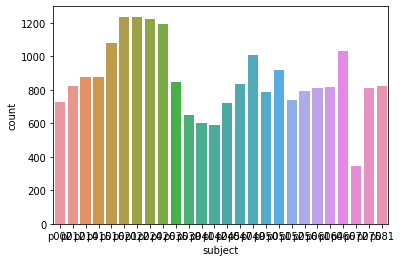

In [8]:
#plotting how the classes are distributed
sns.countplot(df_driver["subject"])

In [9]:
driver_list = df_driver["subject"].unique()
class_id_list = df_driver["classname"].unique()
print("Number of unique drivers: ", len(driver_list))
print("Number of class: ", len(class_id_list))

Number of unique drivers:  26
Number of class:  10


In [10]:
df_driver["subject"].value_counts()

p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p012     823
p081     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64

In [11]:
for c in class_id_list:
    df_class = df_driver[df_driver["classname"] == c]
    classdriver_list = df_class["subject"].unique()
    print("Number of unique drivers in class {}: {}".format(c, len(classdriver_list)))

Number of unique drivers in class c0: 26
Number of unique drivers in class c1: 26
Number of unique drivers in class c2: 26
Number of unique drivers in class c3: 26
Number of unique drivers in class c4: 26
Number of unique drivers in class c5: 26
Number of unique drivers in class c6: 26
Number of unique drivers in class c7: 26
Number of unique drivers in class c8: 26
Number of unique drivers in class c9: 26


In [20]:
CNT_PER_DRIVER_LIST = []
for c in class_id_list:
    df_class = df_driver[df_driver["classname"] == c]
    class_drivers_list = df_class["subject"].unique()
    for d in class_drivers_list:
        df_class_driver = df_class[df_class["subject"] == d]     
        print("class: {}, driver:{}, count:{}".format(c,d, df_class_driver.shape[0]))
        CNT_PER_DRIVER_LIST.append(df_class_driver.shape[0])

class: c0, driver:p002, count:76
class: c0, driver:p012, count:84
class: c0, driver:p014, count:100
class: c0, driver:p015, count:79
class: c0, driver:p016, count:111
class: c0, driver:p021, count:135
class: c0, driver:p022, count:129
class: c0, driver:p024, count:130
class: c0, driver:p026, count:130
class: c0, driver:p035, count:94
class: c0, driver:p039, count:65
class: c0, driver:p041, count:60
class: c0, driver:p042, count:59
class: c0, driver:p045, count:75
class: c0, driver:p047, count:80
class: c0, driver:p049, count:84
class: c0, driver:p050, count:123
class: c0, driver:p051, count:182
class: c0, driver:p052, count:72
class: c0, driver:p056, count:81
class: c0, driver:p061, count:84
class: c0, driver:p064, count:83
class: c0, driver:p066, count:129
class: c0, driver:p072, count:63
class: c0, driver:p075, count:81
class: c0, driver:p081, count:100
class: c1, driver:p002, count:74
class: c1, driver:p012, count:95
class: c1, driver:p014, count:103
class: c1, driver:p015, count:85

class: c9, driver:p051, count:92
class: c9, driver:p052, count:75
class: c9, driver:p056, count:75
class: c9, driver:p061, count:80
class: c9, driver:p064, count:76
class: c9, driver:p066, count:90
class: c9, driver:p072, count:56
class: c9, driver:p075, count:77
class: c9, driver:p081, count:80


In [19]:
MAX_NUM_IMGS_PER_DRIVER = np.max(CNT_PER_DRIVER_LIST)
MIN_NUM_IMGS_PER_DRIVER = np.min(CNT_PER_DRIVER_LIST)
print("MIN_NUM_IMGS_PER_DRIVER: ", MIN_NUM_IMGS_PER_DRIVER)
print("MAX_NUM_IMGS_PER_DRIVER: ", MAX_NUM_IMGS_PER_DRIVER)

MIN_NUM_IMGS_PER_DRIVER:  2
MAX_NUM_IMGS_PER_DRIVER:  182


In [21]:
# creating new train directory with less number of images
import shutil

# clear old content if any
if os.path.exists(out_data_dir):
    shutil.rmtree(out_data_dir)
    
if os.path.exists(out_data_dir):
    shutil.rmtree(out_data_dir)

In [22]:
if not os.path.exists(out_data_dir):
    os.mkdir(out_data_dir)
    
if not os.path.exists(out_train_dir):
    os.mkdir(out_train_dir)

for c in class_id_list:
    class_dir = os.path.join(out_train_dir, c)
    if not os.path.exists(class_dir):
        os.mkdir(class_dir)

In [23]:
NUM_IMGS_PER_DRIVER = 10 # to limit image count pr driver
NUM_IMGS_PER_DRIVER = 200 # to get all the imgs of the drivers

for c in class_id_list:
    print("creating class {} data..".format(c))
    df_class = df_driver[df_driver["classname"] == c]
    class_drivers_list = df_class["subject"].unique()
    for d in class_drivers_list:
        df_class_driver = df_class[df_class["subject"] == d]     
        df_class_driver.reset_index(drop=True, inplace=True)
        indices = np.arange(df_class_driver.shape[0]) # get numbers upto no.of records
        np.random.shuffle(indices) # shuffle the numbers
        for i in indices[:NUM_IMGS_PER_DRIVER]:
            imgfile = df_class_driver.iloc[i].img
            #print("{}:{}:{}".format(c, d, imgfile))
            src = '{}/{}/{}'.format(train_dir, c, imgfile)
            dst = '{}/{}/'.format(out_train_dir, c)
            shutil.copy(src,dst)
            
            dst_file_name = '{}/{}/{}'.format(out_train_dir, c, imgfile)
            new_dst_file_name = '{}/{}/{}_{}'.format(out_train_dir, c, d, imgfile)
            os.rename(dst_file_name, new_dst_file_name)        

creating class c0 data..
creating class c1 data..
creating class c2 data..
creating class c3 data..
creating class c4 data..
creating class c5 data..
creating class c6 data..
creating class c7 data..
creating class c8 data..
creating class c9 data..


In [24]:
for c in class_list:
    print('{}: {} images'.format(c, len(os.listdir(os.path.join(out_train_dir, c)))))

c0: 2489 images
c1: 2267 images
c2: 2317 images
c3: 2346 images
c4: 2326 images
c5: 2312 images
c6: 2325 images
c7: 2002 images
c8: 1911 images
c9: 2129 images
